# Evaluation with distance metric for educational purpose

In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import glob
from plots import loadModel, getMetric
from scipy.stats import wasserstein_distance

from scipy.special import rel_entr

import scipy as sp

from plots import KL, jsd

setGPU: Setting GPU to: 1


In [2]:
f = h5py.File('/mnt/ceph/users/vbarinpa/single_particle/all_noPU.h5', 'r')
#f = h5py.File('/bigdata/shared/HGCAL_data/single_particle/all_noPU.h5', 'r')
X = np.asarray(f['image'])
np.random.shuffle(X)

NameError: name 'kl_div' is not defined

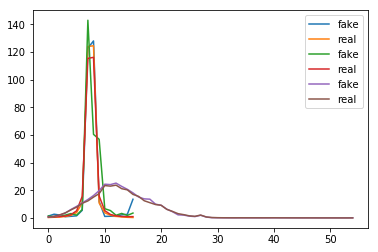

In [4]:
gen_model2 = '../trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'
g_weight2 = '../trial28/weights/generator_weights_epoch_1975_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.h5'

g = loadModel(gen_model2)

g.load_weights(g_weight2)

latent_space=100
n_samples = 2000
noise = np.random.normal(0, 1, (n_samples, latent_space))
generated_images = g.predict(noise)

gen_im_x = np.sum(generated_images, axis=(2, 3))
gen_im_x = np.mean(gen_im_x, axis=0)

real_img_x = np.sum(X[0:n_samples], axis=(2, 3))
real_img_x = np.mean(real_img_x, axis=0)

plt.plot(np.arange(16), gen_im_x, label='fake')
plt.plot(np.arange(16), real_img_x, label='real')
plt.legend()

wasserstein_distance(real_img_x, gen_im_x)

gen_im_y = np.sum(generated_images, axis=(1, 3))
gen_im_y = np.mean(gen_im_y, axis=0)

real_img_y = np.sum(X[0:n_samples], axis=(1, 3))
real_img_y = np.mean(real_img_y, axis=0)

plt.plot(np.arange(16), gen_im_y, label='fake')
plt.plot(np.arange(16), real_img_y, label='real')
plt.legend()

wasserstein_distance(real_img_y, gen_im_y)

gen_im_z = np.sum(generated_images, axis=(1, 2))
gen_im_z = np.mean(gen_im_z, axis=0)

real_img_z = np.sum(X[0:n_samples], axis=(1, 2))
real_img_z = np.mean(real_img_z, axis=0)

plt.plot(np.arange(55), gen_im_z, label='fake')
plt.plot(np.arange(55), real_img_z, label='real')
plt.legend()

wasserstein_distance(real_img_z, gen_im_z)

np.sum(real_img_z)

real_img_z_norm = real_img_z/np.sum(real_img_z)

gen_img_z_norm = gen_im_z/np.sum(gen_im_z)

kl_div(real_img_z_norm, gen_img_z_norm)

np.sum(real_img_z_norm)

max(real_img_z)

kl_div(real_img_z, gen_im_z).shape

rel_entr(real_img_z, gen_im_z).shape

KL(real_img_z, gen_im_z)

jsd(real_img_z_norm, gen_img_z_norm)